In [19]:
#KNN + Cerium + Random forest + its oversampled data + RMSE + R2 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'ALP 7', 'ALP 14', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: RandomForestRegressor)
model = MultiOutputRegressor(RandomForestRegressor(random_state=42,
                                                   min_samples_split=3,min_weight_fraction_leaf=0.0,
                                                   n_estimators=219, ccp_alpha=0.0, n_jobs=-1,
                                                   min_samples_leaf=1,
                                                   max_depth= 12))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using the mean R² score for all outputs
score = model.score(X_test, y_test)
print(f"Mean R² Score for all outputs: {score:.4f}")


SiO2: RMSE = 1.7006, R² = 0.9860
B2O3: RMSE = 0.7629, R² = 0.9428
CaO: RMSE = 1.5696, R² = 0.9617
Na2O: RMSE = 1.5858, R² = 0.9793
P2O5: RMSE = 0.8067, R² = 0.9185
Ce: RMSE = 0.0051, R² = 0.0000
Ce2O3: RMSE = 0.4017, R² = 0.9607
CeO2: RMSE = 1.1954, R² = 0.7416
Overall Model RMSE: 1.0034
Overall Model R² Score: 0.8113
Mean R² Score for all outputs: 0.8113


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: RandomForestRegressor)
model = MultiOutputRegressor(RandomForestRegressor(random_state=42,
                                                   min_samples_split=3, min_weight_fraction_leaf=0.0,
                                                   n_estimators=216, ccp_alpha=0.0, n_jobs=1, # Set n_jobs to 1
                                                   min_samples_leaf=1, max_depth=10))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using the mean R² score for all outputs
score = model.score(X_test, y_test)
print(f"Mean R² Score for all outputs: {score:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 1.7015, R² = 0.9860
B2O3: RMSE = 0.7565, R² = 0.9437
CaO: RMSE = 1.5545, R² = 0.9624
Na2O: RMSE = 1.6265, R² = 0.9782
P2O5: RMSE = 0.8009, R² = 0.9197
Ce: RMSE = 0.0052, R² = 0.0000
Ce2O3: RMSE = 0.4035, R² = 0.9604
CeO2: RMSE = 1.2144, R² = 0.7333
Overall Model RMSE: 1.0079
Overall Model R² Score: 0.8105
Mean R² Score for all outputs: 0.8105
Cross-validated R² scores: [0.75632168 0.67507199 0.78197951 0.76945291 0.73683731]
Mean R² Score across all folds: 0.7439


In [8]:
#KNN + Cerium + Random forest + its oversampled data + RMSE + R2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: RandomForestRegressor)
model = MultiOutputRegressor(RandomForestRegressor(random_state=42,
                                                   min_samples_split=3,min_weight_fraction_leaf=0.0,
                                                   n_estimators=5, ccp_alpha=0.09, n_jobs=-1,
                                                   min_samples_leaf=1,
                                                   max_depth= 10))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using the mean R² score for all outputs
score = model.score(X_test, y_test)
print(f"Mean R² Score for all outputs: {score:.4f}")


SiO2: RMSE = 2.2107, R² = 0.9763
B2O3: RMSE = 0.9373, R² = 0.9136
CaO: RMSE = 2.3892, R² = 0.9113
Na2O: RMSE = 1.7377, R² = 0.9751
P2O5: RMSE = 1.0431, R² = 0.8637
Ce: RMSE = 0.0010, R² = 0.0000
Ce2O3: RMSE = 0.4344, R² = 0.9541
CeO2: RMSE = 1.7599, R² = 0.4400
Overall Model RMSE: 1.3142
Overall Model R² Score: 0.7542
Mean R² Score for all outputs: 0.7542


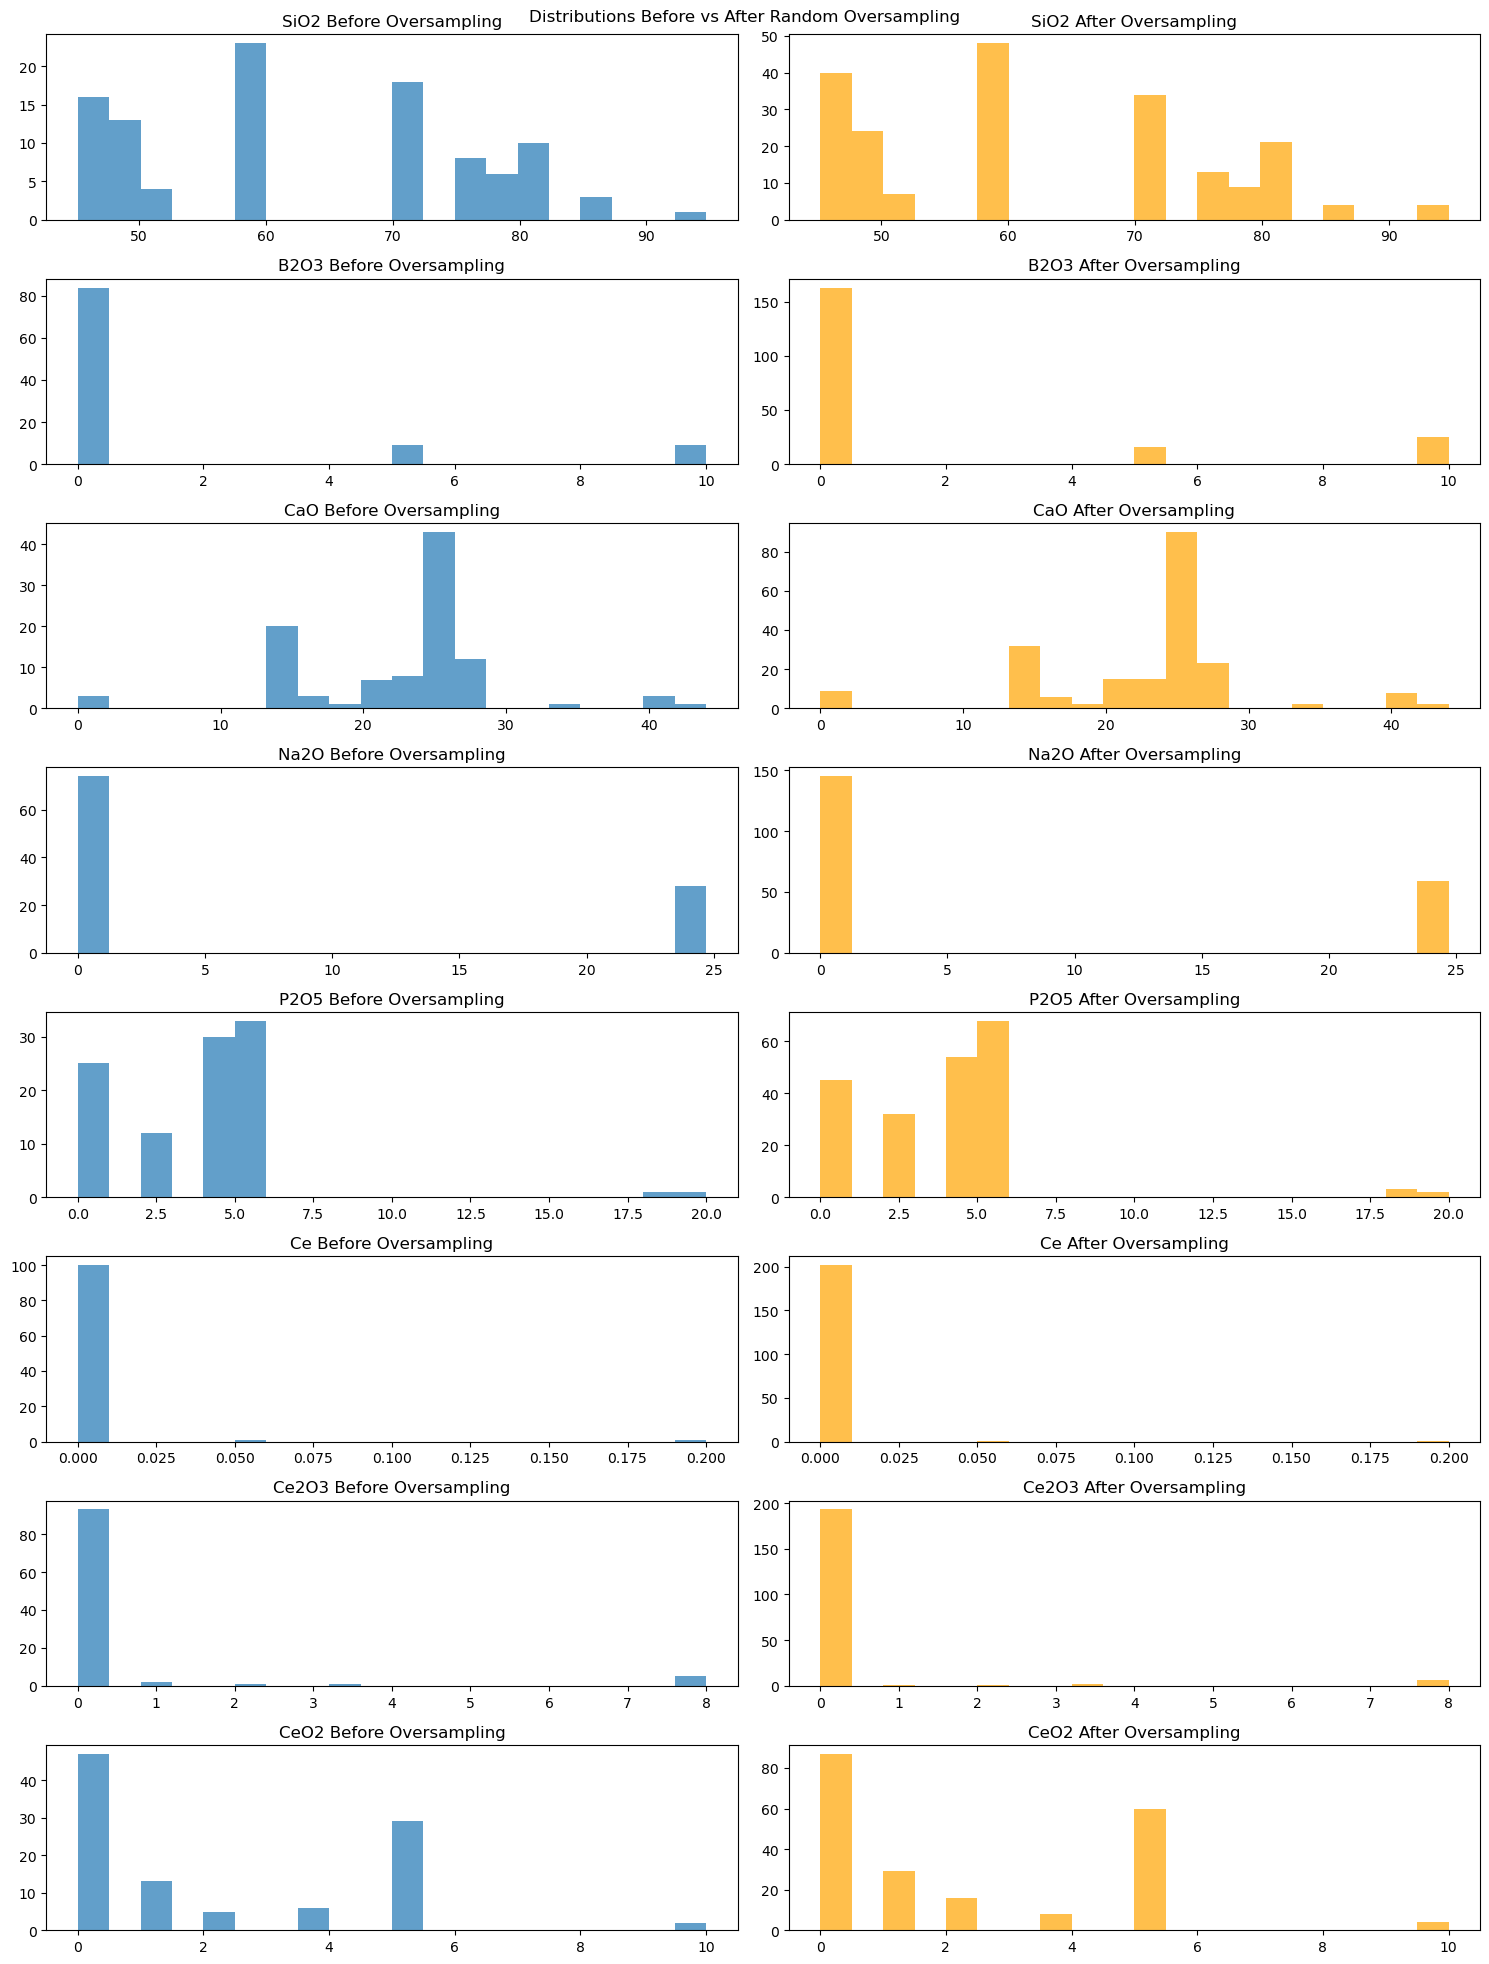

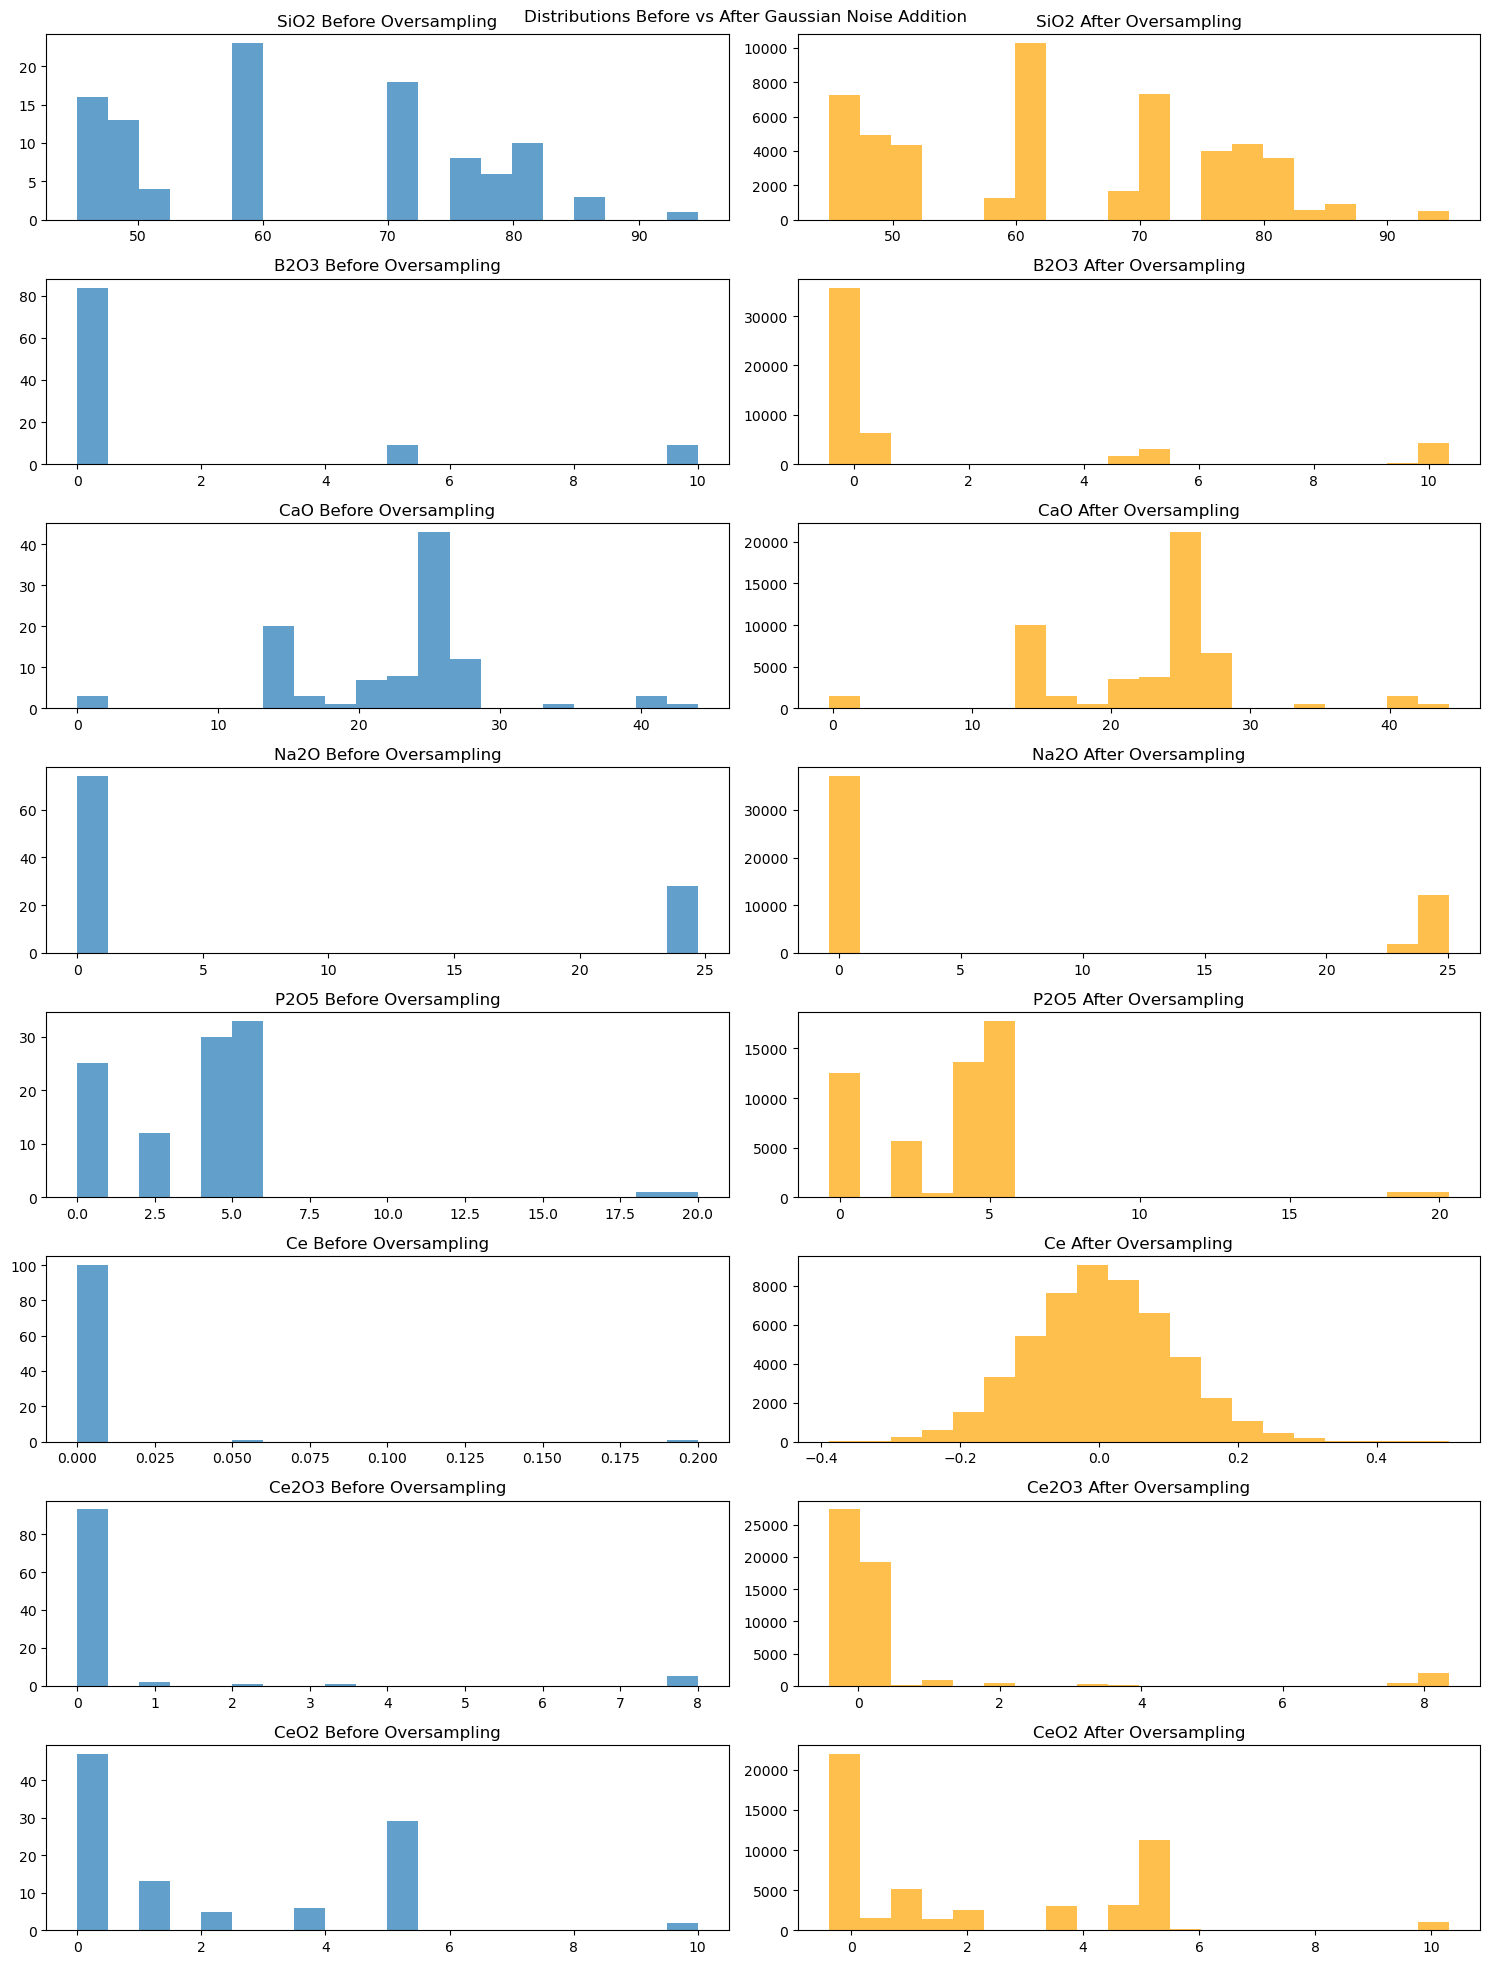

Summary Statistics Before vs After Random Oversampling
       Before Mean  After Mean  Before Std  After Std  Before Median  \
SiO2     63.273922   62.426127   12.979812  13.269200           60.0   
B2O3      1.323529    1.617647    3.060970   3.414095            0.0   
CaO      22.675000   22.832255    7.064725   7.595387           25.0   
Na2O      6.653431    6.991716   10.871527  10.989394            0.0   
P2O5      3.531863    3.654167    3.014066   3.151436            4.0   
Ce        0.002451    0.001225    0.020365   0.014417            0.0   
Ce2O3     0.467647    0.323529    1.768770   1.499010            0.0   
CeO2      2.096078    2.150980    2.479936   2.457611            1.0   

       After Median  
SiO2           60.0  
B2O3            0.0  
CaO            25.0  
Na2O            0.0  
P2O5            4.0  
Ce              0.0  
Ce2O3           0.0  
CeO2            1.0  
Summary Statistics Before vs After Gaussian Noise Addition
       Before Mean  After Mean  Before 

In [20]:
#Oversampled Data + before/after Visualisation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import numpy as np

# Load the dataset
file_path = r"C:\Users\29200\Downloads\Dataset\dropkarungaColumn.xlsx"
data = pd.read_excel(file_path)

# Drop columns with too many NaNs and non-numerical columns
data_cleaned = data.drop(columns=['RESEARCH PAPER/ ARTICLE', 'VEGF'])

# Encode the 'Class' column
label_encoder = LabelEncoder()
data_cleaned['Class'] = label_encoder.fit_transform(data_cleaned['Class'])

# Separate features and target variables
#features = data_cleaned.drop(columns=['Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21'])
#targets = data_cleaned[['Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21']]

# Separate features and target variables
features = data_cleaned[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
                         'Cell Viability 96', 'ALP 7', 'ALP 14', 
                         'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
targets = data_cleaned[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]



# Random Oversampling
X_resampled, y_resampled = resample(features, targets, replace=True, n_samples=len(features) * 2, random_state=42)

# Parameters for Gaussian noise
noise_level = 0.1  # Adjust the noise level as needed
n_samples_to_generate = 500  # Number of new samples to generate

# Generate synthetic samples by adding Gaussian noise
X_resampled_noise = np.vstack([features.values] + [features.values + noise_level * np.random.normal(size=features.values.shape) for _ in range(n_samples_to_generate)])
y_resampled_noise = np.vstack([targets.values] + [targets.values + noise_level * np.random.normal(size=targets.values.shape) for _ in range(n_samples_to_generate)])

# Convert resampled data to DataFrame
features_resampled = pd.DataFrame(X_resampled, columns=features.columns)
targets_resampled = pd.DataFrame(y_resampled, columns=targets.columns)

features_noise = pd.DataFrame(X_resampled_noise, columns=features.columns)
targets_noise = pd.DataFrame(y_resampled_noise, columns=targets.columns)

# Function to plot distributions of the target variables
def plot_distributions(targets_before, targets_after, title):
    fig, axes = plt.subplots(nrows=targets_before.shape[1], ncols=2, figsize=(15, 20))
    for i, column in enumerate(targets_before.columns):
        axes[i, 0].hist(targets_before[column], bins=20, alpha=0.7, label='Before')
        axes[i, 0].set_title(f'{column} Before Oversampling')
        
        axes[i, 1].hist(targets_after[column], bins=20, alpha=0.7, label='After', color='orange')
        axes[i, 1].set_title(f'{column} After Oversampling')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot the distributions
plot_distributions(targets, targets_resampled, "Distributions Before vs After Random Oversampling")
plot_distributions(targets, targets_noise, "Distributions Before vs After Gaussian Noise Addition")

# Function to compare summary statistics
def compare_statistics(targets_before, targets_after, title):
    stats_before = targets_before.describe()
    stats_after = targets_after.describe()

    comparison = pd.DataFrame({
        'Before Mean': stats_before.loc['mean'],
        'After Mean': stats_after.loc['mean'],
        'Before Std': stats_before.loc['std'],
        'After Std': stats_after.loc['std'],
        'Before Median': targets_before.median(),
        'After Median': targets_after.median(),
    })

    print(title)
    print(comparison)

# Compare statistics
compare_statistics(targets, targets_resampled, "Summary Statistics Before vs After Random Oversampling")
compare_statistics(targets, targets_noise, "Summary Statistics Before vs After Gaussian Noise Addition")


In [21]:
#trying SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'ALP 7', 'ALP 14',
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with SVR)
model = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, gamma='auto', degree=3))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 13.1347, R² = 0.1630
B2O3: RMSE = 1.4461, R² = 0.7943
CaO: RMSE = 7.2985, R² = 0.1719
Na2O: RMSE = 11.1748, R² = -0.0292
P2O5: RMSE = 2.2097, R² = 0.3884
Ce: RMSE = 0.1000, R² = 0.0000
Ce2O3: RMSE = 1.8617, R² = 0.1566
CeO2: RMSE = 1.8657, R² = 0.3706
Overall Model RMSE: 4.8864
Overall Model R² Score: 0.2519
Cross-validated R² scores: [  0.33213682   0.22325153   0.21110562   0.29789381 -19.71982104]
Mean R² Score across all folds: -3.7311


In [22]:
import pandas as pd

# Example new input features DataFrame (replace with your actual data)
new_X = pd.DataFrame({
    'Conc.': [0.1, 0.2],
    'Cell Viability 24': [75, 80],
    'Cell Viability 48': [85, 90],
    'Cell Viability 72': [90, 95],
    'Cell Viability 96': [95, 100],
    'ALP 7': [50, 55],
    'ALP 14': [60, 65],
    'Surface area m2/g': [200, 210],
    'Pore volume cm3/g': [0.5, 0.55],
    'Pore size nm': [10, 11]
})

# Predict the target values using the trained model
predictions = model.predict(new_X)

# Create a DataFrame to display the predictions
predictions_df = pd.DataFrame(predictions, columns=['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2'])

# Print the predictions
print(predictions_df)


        SiO2     B2O3       CaO      Na2O      P2O5   Ce     Ce2O3      CeO2
0  60.717435  0.52269  23.91307  1.020467  3.638578  0.1  0.225691  2.022634
1  60.717435  0.52269  23.91307  1.020467  3.638578  0.1  0.225691  2.022634


In [3]:
#trying KNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'ALP 7',   
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with KNeighborsRegressor)
model = MultiOutputRegressor(KNeighborsRegressor(algorithm='ball_tree',n_neighbors=4, weights='distance', n_jobs=-1))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 3.1540, R² = 0.9517
B2O3: RMSE = 0.6920, R² = 0.9529
CaO: RMSE = 0.9039, R² = 0.9873
Na2O: RMSE = 3.3702, R² = 0.9064
P2O5: RMSE = 0.2126, R² = 0.9943
Ce: RMSE = 0.0000, R² = 1.0000
Ce2O3: RMSE = 0.0801, R² = 0.9984
CeO2: RMSE = 0.9732, R² = 0.8287
Overall Model RMSE: 1.1733
Overall Model R² Score: 0.9525
Cross-validated R² scores: [0.87638409 0.96265452 0.78213869 0.95778611 0.53971244]
Mean R² Score across all folds: 0.8237


In [26]:
#trying KNN with Scaling


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Define feature and target columns
X_columns = ['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
             'Cell Viability 96', 'ALP 7', 'ALP 14', 
             'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']
y_columns = ['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']

# Prepare X and y
X = df[X_columns]
y = df[y_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose scaler: MinMaxScaler or StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Choose a multioutput regression model
model = MultiOutputRegressor(KNeighborsRegressor(algorithm='ball_tree', n_neighbors=5, weights='distance', n_jobs=-1))

# Train the model
model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions and true values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y_columns):
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation (Note: cross-validation does not apply the scaler automatically)
# Therefore, we need to use a pipeline or manually scale within each fold if needed
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), MultiOutputRegressor(KNeighborsRegressor(algorithm='ball_tree', n_neighbors=4, weights='distance', n_jobs=-1)))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 4.0006, R² = 0.9224
B2O3: RMSE = 0.6920, R² = 0.9529
CaO: RMSE = 0.9069, R² = 0.9872
Na2O: RMSE = 5.2568, R² = 0.7723
P2O5: RMSE = 0.5719, R² = 0.9590
Ce: RMSE = 0.0000, R² = 0.0000
Ce2O3: RMSE = 1.2415, R² = 0.6249
CeO2: RMSE = 1.1138, R² = 0.7757
Overall Model RMSE: 1.7229
Overall Model R² Score: 0.7493
Cross-validated R² scores: [0.86721679 0.81319853 0.82897985 0.86187351 0.74639237]
Mean R² Score across all folds: 0.8235


In [6]:
#trying extra tree regressors   finalised**

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24h', 'Cell Viability 48h', 'Cell Viability 72h', 
        'Cell Viability 96h', 'ALP 7d', 'ALP 14d',  
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with ExtraTreesRegressor)
model = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 1.6067, R² = 0.9875
B2O3: RMSE = 0.6927, R² = 0.9528
CaO: RMSE = 0.3681, R² = 0.9979
Na2O: RMSE = 1.6066, R² = 0.9787
P2O5: RMSE = 0.0766, R² = 0.9993
Ce: RMSE = 0.0000, R² = 1.0000
Ce2O3: RMSE = 0.2305, R² = 0.9871
CeO2: RMSE = 0.8750, R² = 0.8616
Overall Model RMSE: 0.6820
Overall Model R² Score: 0.9706
Cross-validated R² scores: [0.79755416 0.71353862 0.85720409 0.83798635 0.71426812]
Mean R² Score across all folds: 0.7841


In [32]:
#trying extra tree regressors  **stand by

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'ALP 7',  
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with ExtraTreesRegressor)
model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 1.8184, R² = 0.9840
B2O3: RMSE = 0.6922, R² = 0.9529
CaO: RMSE = 0.3578, R² = 0.9980
Na2O: RMSE = 2.0415, R² = 0.9657
P2O5: RMSE = 0.1064, R² = 0.9986
Ce: RMSE = 0.0000, R² = 1.0000
Ce2O3: RMSE = 0.2532, R² = 0.9844
CeO2: RMSE = 0.8671, R² = 0.8640
Overall Model RMSE: 0.7671
Overall Model R² Score: 0.9684
Cross-validated R² scores: [0.80166855 0.71518022 0.85138945 0.93864042 0.79216037]
Mean R² Score across all folds: 0.8198


In [28]:
#trying ElasticNet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'ALP 7', 'ALP 14',  
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with ElasticNet)
model = MultiOutputRegressor(ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 10.8535, R² = 0.4285
B2O3: RMSE = 2.7807, R² = 0.2394
CaO: RMSE = 5.4549, R² = 0.5374
Na2O: RMSE = 9.9618, R² = 0.1821
P2O5: RMSE = 2.8810, R² = -0.0396
Ce: RMSE = 0.0017, R² = 0.0000
Ce2O3: RMSE = 1.9949, R² = 0.0316
CeO2: RMSE = 2.3696, R² = -0.0153
Overall Model RMSE: 4.5373
Overall Model R² Score: 0.1705
Cross-validated R² scores: [0.10545918 0.26704817 0.1803759  0.15173966 0.19798353]
Mean R² Score across all folds: 0.1805


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'ALP 7', 'ALP 14',
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with ElasticNet)
model = MultiOutputRegressor(ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 10.8535, R² = 0.4285
B2O3: RMSE = 2.7807, R² = 0.2394
CaO: RMSE = 5.4288, R² = 0.5418
Na2O: RMSE = 9.9529, R² = 0.1836
P2O5: RMSE = 2.8810, R² = -0.0396
Ce: RMSE = 0.0017, R² = 0.0000
Ce2O3: RMSE = 1.9949, R² = 0.0316
CeO2: RMSE = 2.3567, R² = -0.0042
Overall Model RMSE: 4.5313
Overall Model R² Score: 0.1726
Cross-validated R² scores: [0.11304685 0.27268819 0.18062318 0.15167492 0.19911928]
Mean R² Score across all folds: 0.1834


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import MultiTaskLasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Define feature and target columns
X_columns = ['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
             'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
             'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']
y_columns = ['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']

# Prepare X and y
X = df[X_columns]
y = df[y_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Choose scaler: MinMaxScaler or StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Choose a multioutput regression model with L1 regularization
alpha = 0.9  # You can adjust the regularization strength
model = MultiTaskLasso(alpha=alpha)

# Train the model
model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions and true values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Calculate RMSE and R² score for each output variable
overall_rmse = 0
for i, column in enumerate(y_columns):
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    overall_rmse += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse /= y.shape[1]

# Overall model score
overall_r2 = r2_score(y_test, y_pred)
print(f"Overall Model RMSE: {overall_rmse:.4f}")
print(f"Overall Model R² Score: {overall_r2:.4f}")

# Evaluate the model using cross-validation (Note: cross-validation does not apply the scaler automatically)
# Therefore, we need to use a pipeline or manually scale within each fold if needed
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), MultiTaskLasso(alpha=alpha))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² Score across all folds: {np.mean(cv_scores):.4f}")


SiO2: RMSE = 14.4421, R² = -0.0119
B2O3: RMSE = 3.2058, R² = -0.0109
CaO: RMSE = 8.0809, R² = -0.0152
Na2O: RMSE = 11.0163, R² = -0.0002
P2O5: RMSE = 2.8515, R² = -0.0185
Ce: RMSE = 0.0017, R² = 0.0000
Ce2O3: RMSE = 2.0521, R² = -0.0247
CeO2: RMSE = 2.3810, R² = -0.0251
Overall Model RMSE: 5.5039
Overall Model R² Score: -0.0133
Cross-validated R² scores: [0.17665207 0.24722628 0.22393949 0.21736967 0.25720535]
Mean R² Score across all folds: 0.2245


In [20]:
#trying GBM


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Assuming your X and y are prepared based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Choose a multioutput regression model (Example: MultiOutputRegressor with GradientBoostingRegressor)
model_gbm = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Train the model
model_gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = model_gbm.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse_gbm = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_gbm[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_gbm[:, i])
    overall_rmse_gbm += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse_gbm /= y.shape[1]

# Overall model score
overall_r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"Overall Model RMSE (GBM): {overall_rmse_gbm:.4f}")
print(f"Overall Model R² Score (GBM): {overall_r2_gbm:.4f}")

# Evaluate the model using cross-validation
cv_scores_gbm = cross_val_score(model_gbm, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores (GBM): {cv_scores_gbm}")
print(f"Mean R² Score across all folds (GBM): {np.mean(cv_scores_gbm):.4f}")


SiO2: RMSE = 0.8921, R² = 0.9956
B2O3: RMSE = 0.4831, R² = 0.9709
CaO: RMSE = 1.3742, R² = 0.9724
Na2O: RMSE = 0.2391, R² = 0.9995
P2O5: RMSE = 0.4397, R² = 0.9835
Ce: RMSE = 0.0000, R² = 0.0000
Ce2O3: RMSE = 0.3867, R² = 0.9733
CeO2: RMSE = 1.3640, R² = 0.7183
Overall Model RMSE (GBM): 0.6474
Overall Model R² Score (GBM): 0.8267
Cross-validated R² scores (GBM): [0.7794085  0.70093579 0.79041045 0.77688991 0.69365436]
Mean R² Score across all folds (GBM): 0.7483


In [37]:
!pip install shap


                                              0.0/456.1 kB ? eta -:--:--
     ---                                   41.0/456.1 kB 653.6 kB/s eta 0:00:01
     ----------                             122.9/456.1 kB 1.8 MB/s eta 0:00:01
     -----------------                      204.8/456.1 kB 1.6 MB/s eta 0:00:01
     -------------------                    235.5/456.1 kB 1.6 MB/s eta 0:00:01
     -------------------------------        378.9/456.1 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 456.1/456.1 kB 1.7 MB/s eta 0:00:00
                                              0.0/14.8 MB ? eta -:--:--
                                              0.1/14.8 MB 3.5 MB/s eta 0:00:05
                                              0.3/14.8 MB 3.9 MB/s eta 0:00:04
     -                                        0.5/14.8 MB 4.4 MB/s eta 0:00:04
     -                                        0.6/14.8 MB 3.5 MB/s eta 0:00:05
     -                                        0.6/14.8 MB 3

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\29200\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [40]:
!pip install shap


  Using cached shap-0.46.0-cp311-cp311-win_amd64.whl (456 kB)


In [42]:
pip install numpy==1.24.0



                                              0.0/14.8 MB ? eta -:--:--
                                              0.0/14.8 MB ? eta -:--:--
                                              0.0/14.8 MB ? eta -:--:--
                                             0.1/14.8 MB 655.4 kB/s eta 0:00:23
                                             0.1/14.8 MB 654.9 kB/s eta 0:00:23
                                             0.1/14.8 MB 708.1 kB/s eta 0:00:21
                                             0.1/14.8 MB 708.1 kB/s eta 0:00:21
                                             0.2/14.8 MB 551.6 kB/s eta 0:00:27
                                             0.2/14.8 MB 551.6 kB/s eta 0:00:27
                                             0.2/14.8 MB 551.6 kB/s eta 0:00:27
                                             0.2/14.8 MB 551.6 kB/s eta 0:00:27
                                             0.2/14.8 MB 551.6 kB/s eta 0:00:27
                                             0.2/14.8 MB 551.6 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
seaborn 0.12.2 requires numpy!=1.24.0,>=1.17, but you have numpy 1.24.0 which is incompatible.


In [48]:
#trying bagging regressor 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Prepare X and y based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Define models
bagging_model = MultiOutputRegressor(BaggingRegressor(estimator=GradientBoostingRegressor(random_state=42),n_estimators=50, random_state=42))
gbm_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
ada_model = MultiOutputRegressor(AdaBoostRegressor(random_state=42))

# Fit models
bagging_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Predict and evaluate BaggingRegressor
y_pred_bagging = bagging_model.predict(X_test)
overall_rmse_bagging = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_bagging[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_bagging[:, i])
    overall_rmse_bagging += rmse
    print(f"Bagging - {column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
overall_rmse_bagging /= y.shape[1]
overall_r2_bagging = r2_score(y_test, y_pred_bagging)
print(f"Overall Model RMSE (Bagging): {overall_rmse_bagging:.4f}")
print(f"Overall Model R² Score (Bagging): {overall_r2_bagging:.4f}")

# Predict and evaluate GradientBoostingRegressor
y_pred_gbm = gbm_model.predict(X_test)
overall_rmse_gbm = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_gbm[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_gbm[:, i])
    overall_rmse_gbm += rmse
    print(f"GBM - {column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
overall_rmse_gbm /= y.shape[1]
overall_r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"Overall Model RMSE (GBM): {overall_rmse_gbm:.4f}")
print(f"Overall Model R² Score (GBM): {overall_r2_gbm:.4f}")

# Predict and evaluate AdaBoostRegressor
y_pred_ada = ada_model.predict(X_test)
overall_rmse_ada = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_ada[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_ada[:, i])
    overall_rmse_ada += rmse
    print(f"AdaBoost - {column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
overall_rmse_ada /= y.shape[1]
overall_r2_ada = r2_score(y_test, y_pred_ada)
print(f"Overall Model RMSE (AdaBoost): {overall_rmse_ada:.4f}")
print(f"Overall Model R² Score (AdaBoost): {overall_r2_ada:.4f}")

# Cross-validation scores for BaggingRegressor
cv_scores_bagging = cross_val_score(bagging_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores (Bagging): {cv_scores_bagging}")
print(f"Mean R² Score across all folds (Bagging): {cv_scores_bagging.mean():.4f}")

# Cross-validation scores for GradientBoostingRegressor
cv_scores_gbm = cross_val_score(gbm_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores (GBM): {cv_scores_gbm}")
print(f"Mean R² Score across all folds (GBM): {cv_scores_gbm.mean():.4f}")

# Cross-validation scores for AdaBoostRegressor
cv_scores_ada = cross_val_score(ada_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores (AdaBoost): {cv_scores_ada}")
print(f"Mean R² Score across all folds (AdaBoost): {cv_scores_ada.mean():.4f}")


import shap

# Visualize SHAP values for each target variable
for i, target in enumerate(y.columns):
    print(f"SHAP values for target: {target}")
    shap.summary_plot(shap_values[i], X_test, plot_type="bar", feature_names=X.columns)
    shap.summary_plot(shap_values[i], X_test, feature_names=X.columns)


Bagging - SiO2: RMSE = 2.2341, R² = 0.9758
Bagging - B2O3: RMSE = 0.7691, R² = 0.9418
Bagging - CaO: RMSE = 1.9505, R² = 0.9409
Bagging - Na2O: RMSE = 2.0179, R² = 0.9664
Bagging - P2O5: RMSE = 0.9610, R² = 0.8843
Bagging - Ce: RMSE = 0.0042, R² = 0.0000
Bagging - Ce2O3: RMSE = 0.2885, R² = 0.9797
Bagging - CeO2: RMSE = 1.4798, R² = 0.6041
Overall Model RMSE (Bagging): 1.2132
Overall Model R² Score (Bagging): 0.7866
GBM - SiO2: RMSE = 1.2041, R² = 0.9930
GBM - B2O3: RMSE = 0.6816, R² = 0.9543
GBM - CaO: RMSE = 1.0368, R² = 0.9833
GBM - Na2O: RMSE = 2.3892, R² = 0.9530
GBM - P2O5: RMSE = 0.6425, R² = 0.9483
GBM - Ce: RMSE = 0.0000, R² = 0.0000
GBM - Ce2O3: RMSE = 0.3410, R² = 0.9717
GBM - CeO2: RMSE = 1.3528, R² = 0.6691
Overall Model RMSE (GBM): 0.9560
Overall Model R² Score (GBM): 0.8091
AdaBoost - SiO2: RMSE = 2.6243, R² = 0.9666
AdaBoost - B2O3: RMSE = 0.9675, R² = 0.9079
AdaBoost - CaO: RMSE = 3.0035, R² = 0.8598
AdaBoost - Na2O: RMSE = 0.4202, R² = 0.9985
AdaBoost - P2O5: RMSE = 1

ImportError: Numba needs NumPy 1.24 or less

In [4]:
#trying adaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor

# Choose a multioutput regression model (Example: MultiOutputRegressor with AdaBoostRegressor)
model_adaboost = MultiOutputRegressor(AdaBoostRegressor(n_estimators=90, random_state=42))

# Train the model
model_adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = model_adaboost.predict(X_test)

# Calculate RMSE and R² score for each output variable
overall_rmse_adaboost = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_adaboost[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_adaboost[:, i])
    overall_rmse_adaboost += rmse
    print(f"{column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

# Calculate overall RMSE
overall_rmse_adaboost /= y.shape[1]

# Overall model score
overall_r2_adaboost = r2_score(y_test, y_pred_adaboost)
print(f"Overall Model RMSE (AdaBoost): {overall_rmse_adaboost:.4f}")
print(f"Overall Model R² Score (AdaBoost): {overall_r2_adaboost:.4f}")

# Evaluate the model using cross-validation
cv_scores_adaboost = cross_val_score(model_adaboost, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores (AdaBoost): {cv_scores_adaboost}")
print(f"Mean R² Score across all folds (AdaBoost): {np.mean(cv_scores_adaboost):.4f}")


SiO2: RMSE = 2.1077, R² = 0.9784
B2O3: RMSE = 0.9675, R² = 0.9079
CaO: RMSE = 2.5894, R² = 0.8958
Na2O: RMSE = 0.6841, R² = 0.9961
P2O5: RMSE = 1.4569, R² = 0.7341
Ce: RMSE = 0.0000, R² = 1.0000
Ce2O3: RMSE = 0.0932, R² = 0.9979
CeO2: RMSE = 1.8492, R² = 0.3817
Overall Model RMSE (AdaBoost): 1.2185
Overall Model R² Score (AdaBoost): 0.8615
Cross-validated R² scores (AdaBoost): [0.79213427 0.8778077  0.71792802 0.75903838 0.62656028]
Mean R² Score across all folds (AdaBoost): 0.7547


In [11]:
!pip install lightgbm xgboost catboost


                                              0.0/1.4 MB ? eta -:--:--
     --                                       0.1/1.4 MB 1.7 MB/s eta 0:00:01
     ---------                                0.4/1.4 MB 3.7 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 4.3 MB/s eta 0:00:01
     --------------------------               0.9/1.4 MB 5.0 MB/s eta 0:00:01
     ------------------------------------     1.3/1.4 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00
                                              0.0/101.1 MB ? eta -:--:--
                                              0.3/101.1 MB 8.3 MB/s eta 0:00:13
                                              0.6/101.1 MB 8.1 MB/s eta 0:00:13
                                              1.0/101.1 MB 7.8 MB/s eta 0:00:13
                                              1.3/101.1 MB 7.3 MB/s eta 0:00:14
                                              1.7/101.1 MB 7.7 MB/s 

In [32]:

import xgboost
import catboost


In [44]:
#trying SGB, CAT


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Prepare X and y based on your specific columns
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Define models

xgb_model = MultiOutputRegressor(XGBRegressor(random_state=42))
catboost_model = MultiOutputRegressor(CatBoostRegressor(random_seed=42, silent=True))

# Fit models

xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)


# Predict and evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
overall_rmse_xgb = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_xgb[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_xgb[:, i])
    overall_rmse_xgb += rmse
    print(f"XGBoost - {column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
overall_rmse_xgb /= y.shape[1]
overall_r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Overall Model RMSE (XGBoost): {overall_rmse_xgb:.4f}")
print(f"Overall Model R² Score (XGBoost): {overall_r2_xgb:.4f}")

# Predict and evaluate CatBoost
y_pred_catboost = catboost_model.predict(X_test)
overall_rmse_catboost = 0
for i, column in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_catboost[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_catboost[:, i])
    overall_rmse_catboost += rmse
    print(f"CatBoost - {column}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
overall_rmse_catboost /= y.shape[1]
overall_r2_catboost = r2_score(y_test, y_pred_catboost)
print(f"Overall Model RMSE (CatBoost): {overall_rmse_catboost:.4f}")
print(f"Overall Model R² Score (CatBoost): {overall_r2_catboost:.4f}")

# Cross-validation scores for LightGBM
#cv_scores_lgbm = cross_val_score(lgbm_model, X, y, cv=5, scoring='r2')
#print(f"Cross-validated R² scores (LightGBM): {cv_scores_lgbm}")
#print(f"Mean R² Score across all folds (LightGBM): {cv_scores_lgbm.mean():.4f}")

# Cross-validation scores for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores (XGBoost): {cv_scores_xgb}")
print(f"Mean R² Score across all folds (XGBoost): {cv_scores_xgb.mean():.4f}")

# Cross-validation scores for CatBoost
cv_scores_catboost = cross_val_score(catboost_model, X, y, cv=4, scoring='r2')
print(f"Cross-validated R² scores (CatBoost): {cv_scores_catboost}")
print(f"Mean R² Score across all folds (CatBoost): {cv_scores_catboost.mean():.4f}")


XGBoost - SiO2: RMSE = 0.2065, R² = 0.9998
XGBoost - B2O3: RMSE = 0.6919, R² = 0.9529
XGBoost - CaO: RMSE = 1.1575, R² = 0.9792
XGBoost - Na2O: RMSE = 0.1319, R² = 0.9999
XGBoost - P2O5: RMSE = 0.2435, R² = 0.9926
XGBoost - Ce: RMSE = 0.0001, R² = 0.0000
XGBoost - Ce2O3: RMSE = 1.4832, R² = 0.4647
XGBoost - CeO2: RMSE = 1.1348, R² = 0.7671
Overall Model RMSE (XGBoost): 0.6312
Overall Model R² Score (XGBoost): 0.7695
CatBoost - SiO2: RMSE = 0.9097, R² = 0.9960
CatBoost - B2O3: RMSE = 0.6884, R² = 0.9534
CatBoost - CaO: RMSE = 0.4126, R² = 0.9974
CatBoost - Na2O: RMSE = 2.2163, R² = 0.9595
CatBoost - P2O5: RMSE = 0.1267, R² = 0.9980
CatBoost - Ce: RMSE = 0.0000, R² = 0.0000
CatBoost - Ce2O3: RMSE = 0.2266, R² = 0.9875
CatBoost - CeO2: RMSE = 1.1011, R² = 0.7808
Overall Model RMSE (CatBoost): 0.7102
Overall Model R² Score (CatBoost): 0.8341
Cross-validated R² scores (XGBoost): [0.78170807 0.67971575 0.76033104 0.74270046 0.69129902]
Mean R² Score across all folds (XGBoost): 0.7312
Cross-v

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load dataset
file_path = r"C:\Users\29200\Downloads\Dataset\oversampled_resampled.xlsx"
df = pd.read_excel(file_path)

# Prepare X and y
X = df[['Conc.', 'Cell Viability 24', 'Cell Viability 48', 'Cell Viability 72', 
        'Cell Viability 96', 'Cell Viability 120', 'ALP 7', 'ALP 14', 'ALP 21', 
        'Surface area m2/g', 'Pore volume cm3/g', 'Pore size nm']]
y = df[['SiO2', 'B2O3', 'CaO', 'Na2O', 'P2O5', 'Ce', 'Ce2O3', 'CeO2']]

# Define the model
model = MultiOutputRegressor(KNeighborsRegressor(algorithm='ball_tree', n_neighbors=4, weights='distance', n_jobs=-1))

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

biases = []
variances = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Bias calculation: Average error on the training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    biases.append(train_mse)
    
    # Variance calculation: Variance of predictions on the validation set
    test_mse = mean_squared_error(y_test, y_test_pred)
    variances.append(test_mse)

# Calculate mean bias and variance
mean_bias = np.mean(biases)
mean_variance = np.mean(variances)

# Output results
print(f"Mean Bias (Training MSE): {mean_bias:.4f}")
print(f"Mean Variance (Validation MSE): {mean_variance:.4f}")


Mean Bias (Training MSE): 0.0662
Mean Variance (Validation MSE): 3.1450
